In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_csv("../data/crispr_guides_day1.csv")
df.head()

,guide_sequence,efficiency
0,TGCAGCCGCACCGTGATAGA,0.119
1,GGCGCCTTTACCCAACCTTA,0.377
2,AGAAACCCTGGCTGCCACAT,0.093
3,GAGTTCTACGATGCGATTTG,0.823
4,CTCCGAGAGGGTTAATGTGG,0.384


In [25]:
#encode a single sequence
BASE_TO_VEC = {
    "A": [1, 0, 0, 0],
    "C": [0, 1, 0, 0],
    "G": [0, 0, 1, 0],
    "T": [0, 0, 0, 1]
}

def one_hot_encode(seq):
    return np.array([BASE_TO_VEC[base] for base in seq])

sample_seq= df["guide_sequence"].iloc[12]
encoded_sample = one_hot_encode(sample_seq)

encoded_sample.shape

(20, 4)

In [26]:
#encode our entire dataset

encoded_sequences = np.array([one_hot_encode(seq) for seq in df["guide_sequence"]])
encoded_sequences.shape

(1000, 20, 4)

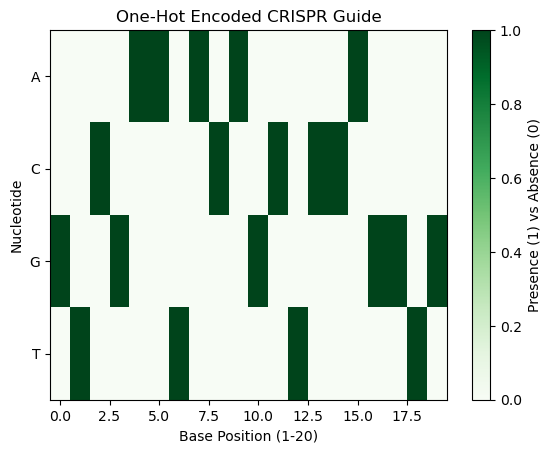

In [27]:
#visualize encoded guide as a heatmap

plt.figure()
plt.imshow(
    encoded_sample.T,
    aspect="auto",
    cmap="Greens"
)
plt.yticks([0,1,2,3], ["A", "C", "G", "T"])
plt.xlabel("Base Position (1-20)")
plt.ylabel("Nucleotide")
plt.title("One-Hot Encoded CRISPR Guide")
plt.colorbar(label="Presence (1) vs Absence (0)")
plt.savefig("../outputs/one_hot_encoded_crispr_guide_02.png", dpi= 300)
plt.show()

In [28]:
os.makedirs("../data/encoded", exist_ok = True)
np.save("../data/encoded/X_day2.npy", encoded_sequences)
np.save("../data/encoded/y_day2.npy", df["efficiency"].values)

print("Encoded sequences and labels saved.")

Encoded sequences and labels saved.
